In [1]:
#Importing libraries
import numpy as np
import pandas as pd

# To import file
from google.colab import files
uploaded = files.upload()

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

Saving train.csv to train.csv


In [2]:
# Reading into a pandas dataframe
df=pd.read_csv("train.csv")

# Data Cleaning

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# setting to max columns, so that we can see entire dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
#removing Id column - as this is only a count of rows
df = df.drop('Id', axis = 1)

In [8]:
#Checking null values / missing if any
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [9]:
# drop columns which has 80% of data as NA
threshold = 0.8 * len(df)
df = df.dropna(axis=1, thresh=threshold)

In [10]:
df.shape

(1460, 75)

In [11]:
# prompt: all numerical data set NA to mean value

df.fillna(df.mean(), inplace=True)


In [12]:
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [13]:
# Specify the constant value for filling NA in categorical columns
constant_value = "Other"

# Fill NA values with the constant value
df = df.fillna(constant_value)

In [14]:
#Checking null values / missing if any
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [16]:
# separate categorical and numerical columns

categorical_columns = df.select_dtypes(include=['object', 'category'])
numerical_columns = df.select_dtypes(exclude=['object', 'category'])


# Create plots

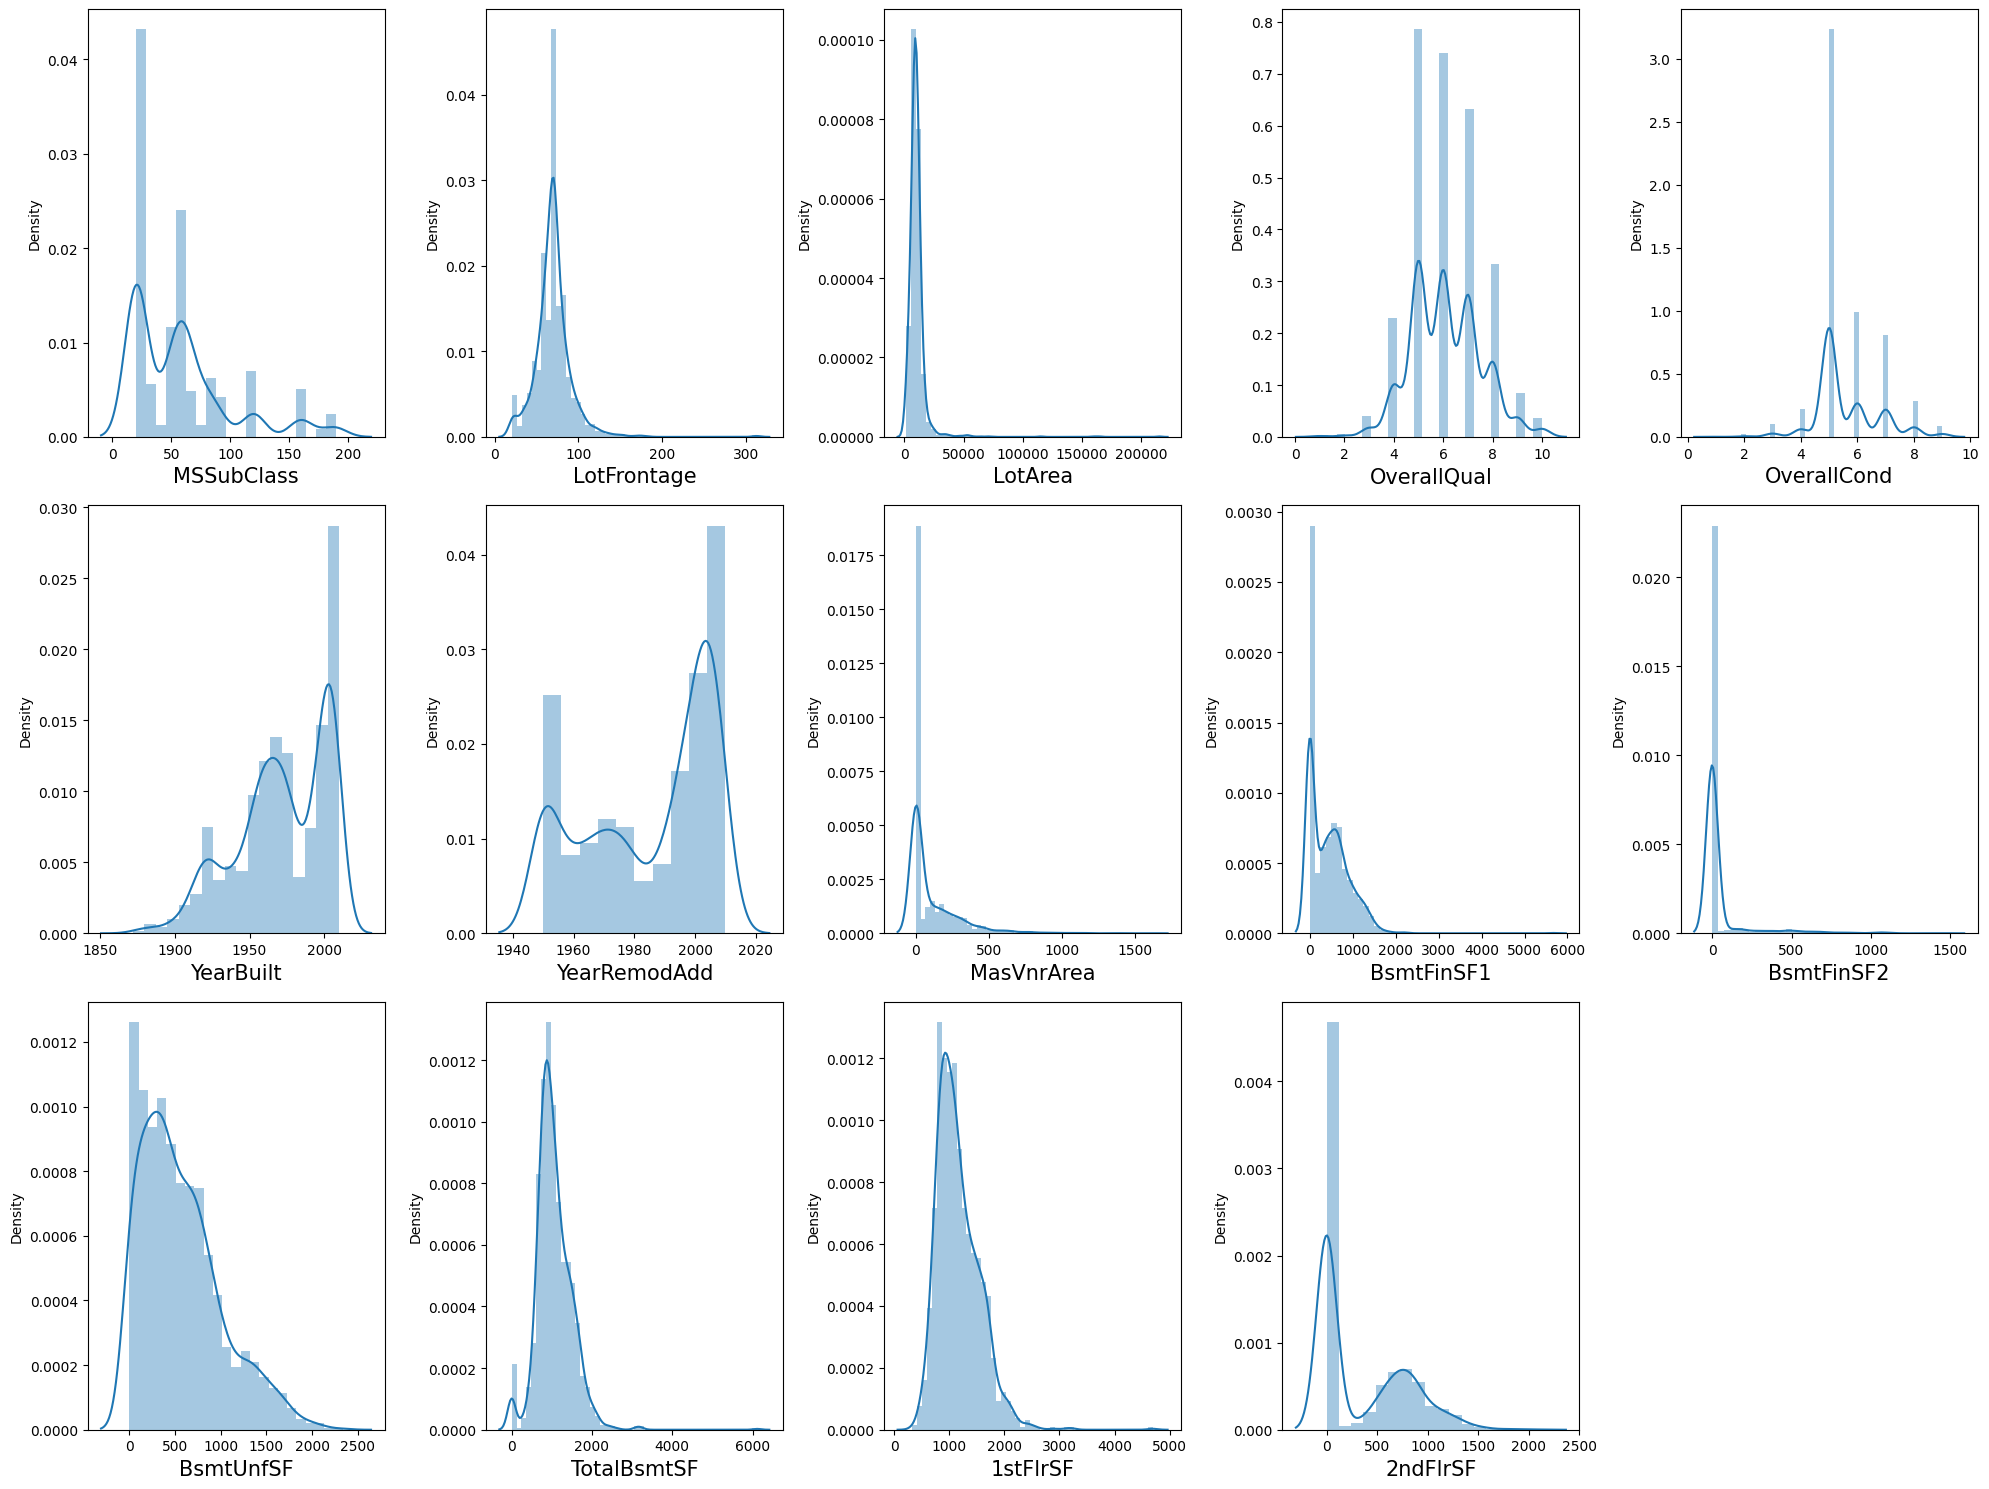

In [17]:

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

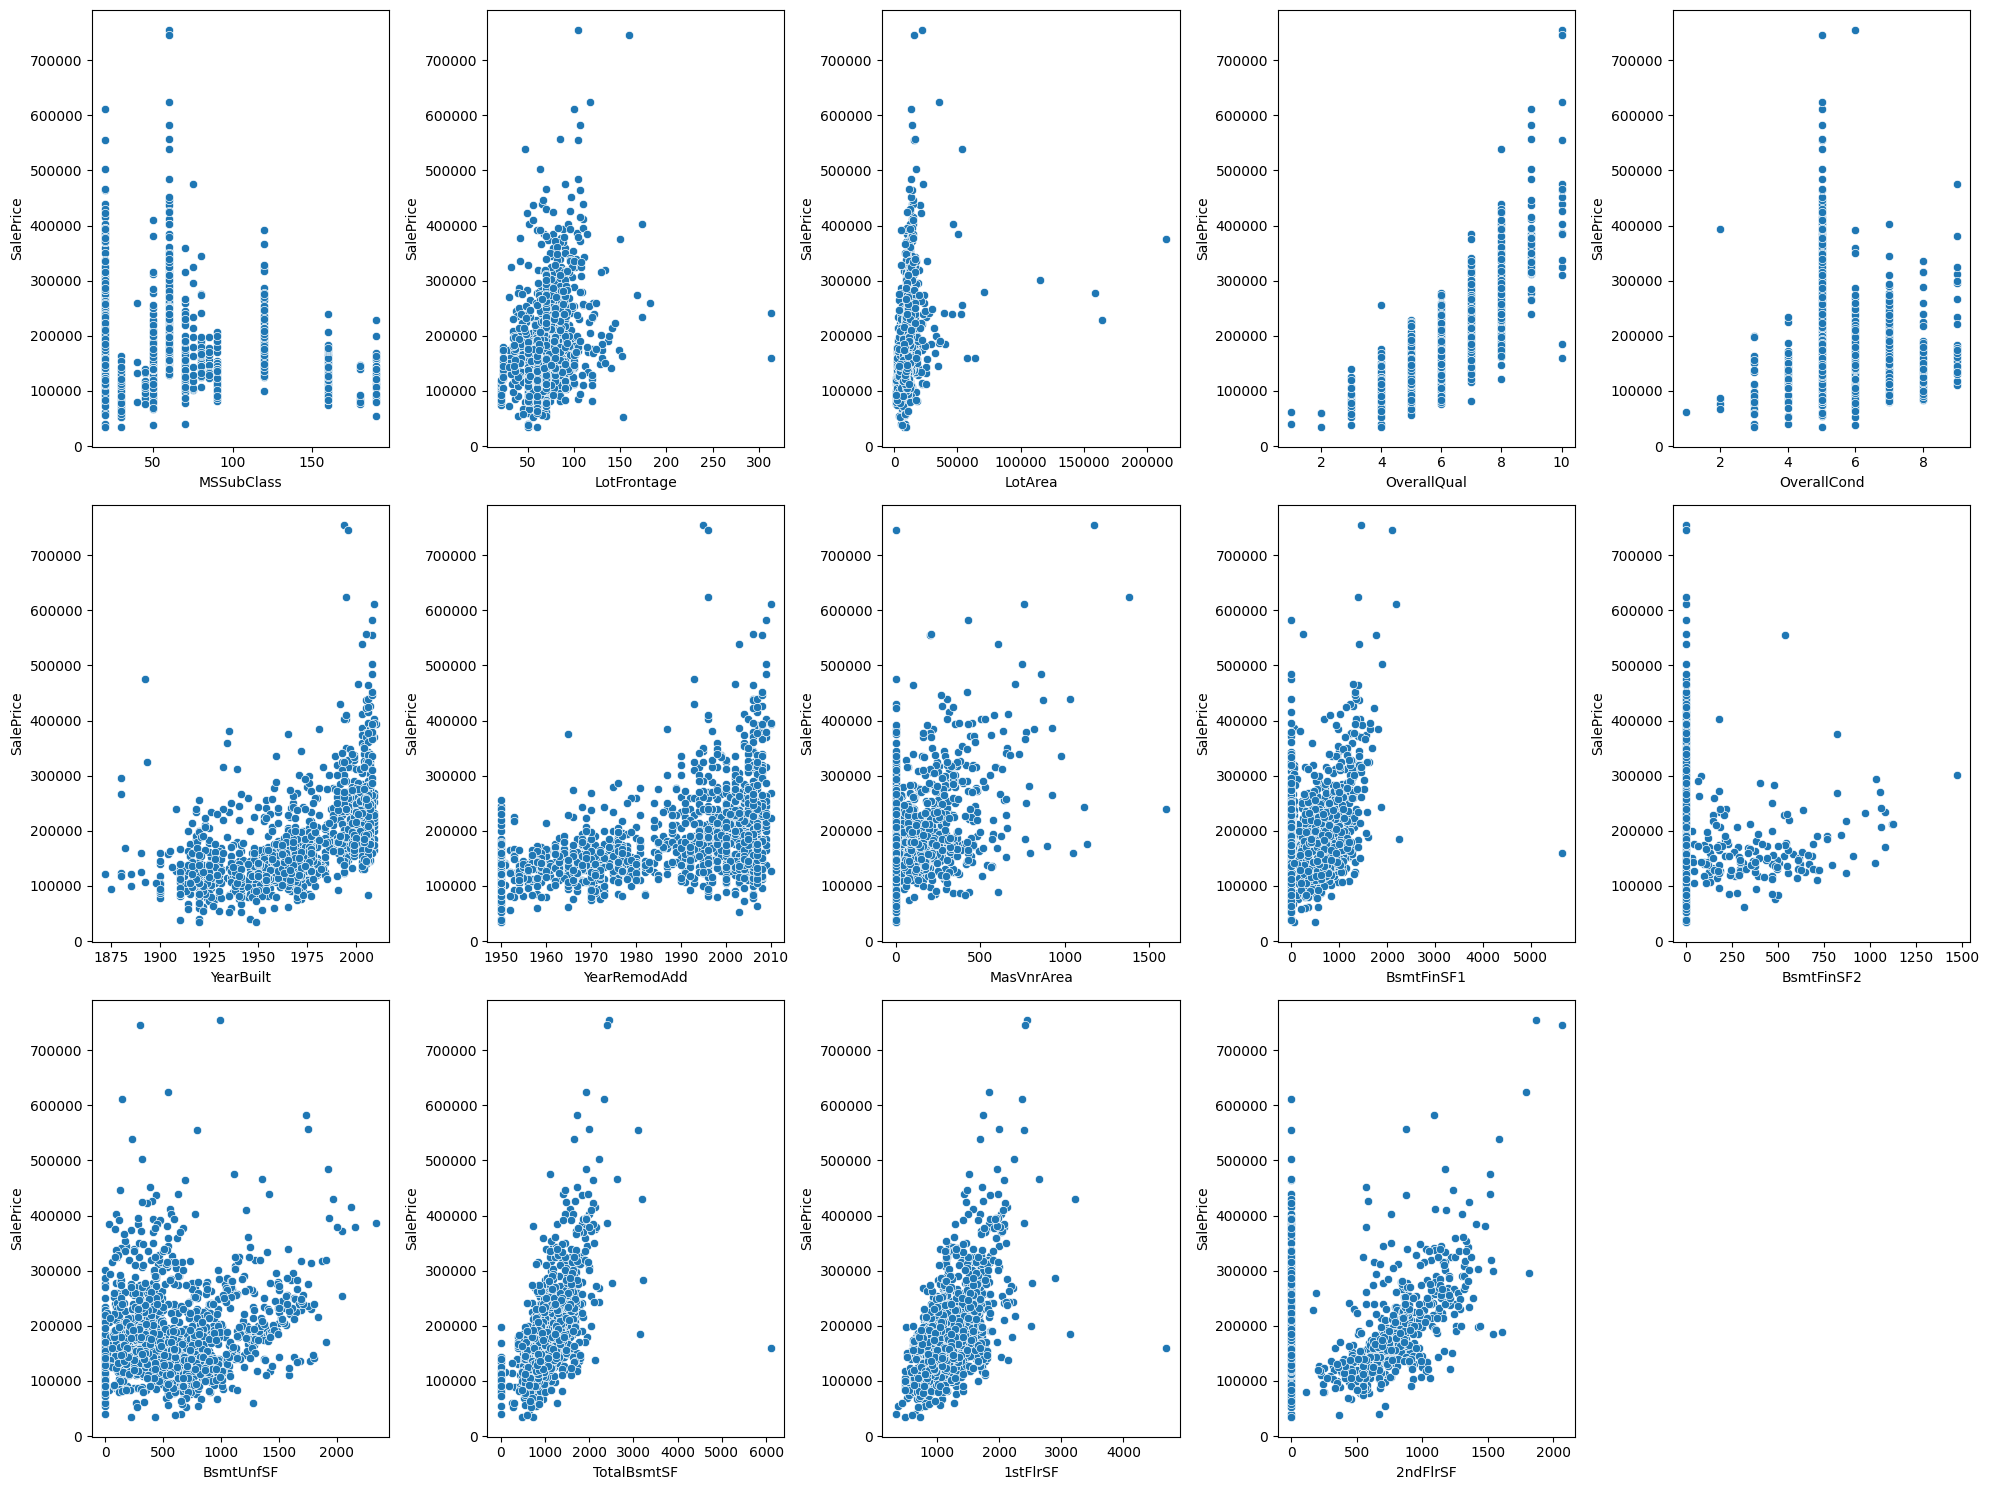

In [18]:
# Plotting `Price` with remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df[column], y = df['SalePrice'])

    plotnumber += 1

plt.tight_layout()
plt.show()

In [19]:
plt.figure(figsize = (100, 100))
sns.boxplot(data = df, width = 1.8)
plt.show()

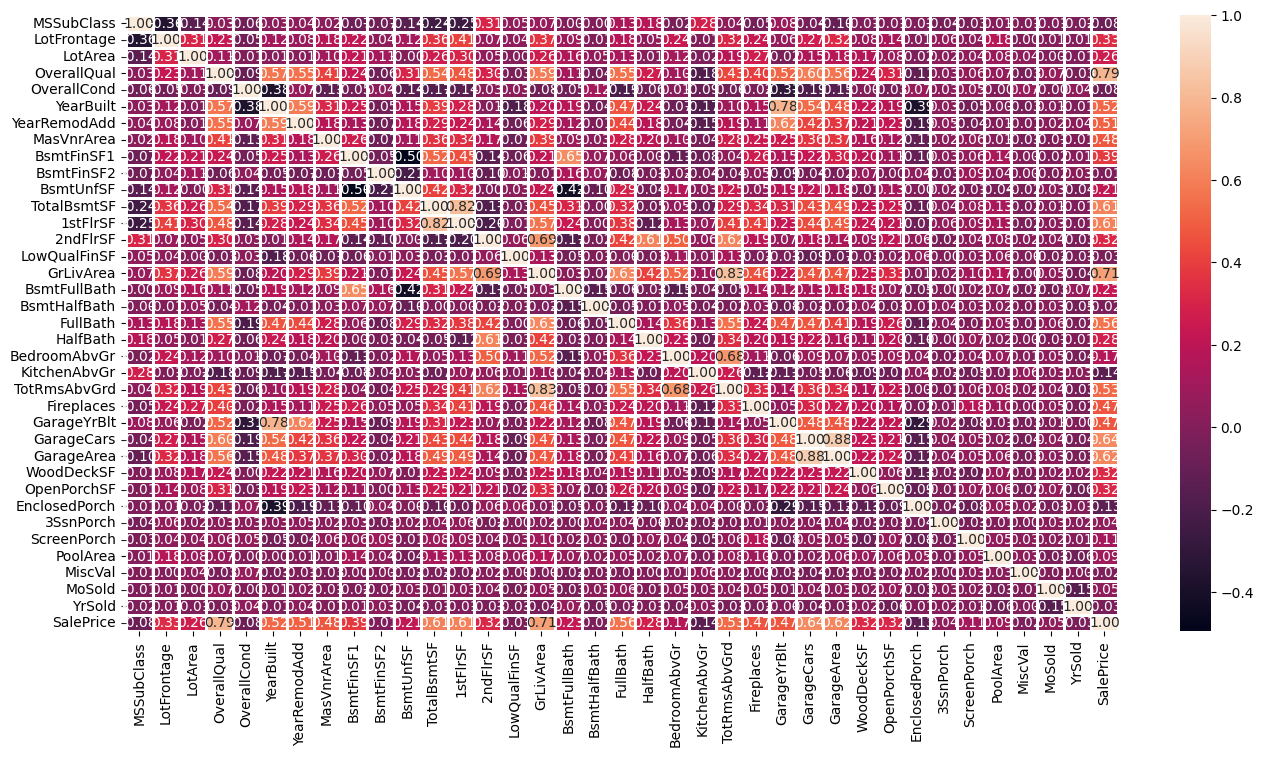

In [20]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [21]:
# Count the occurrences of each category
for column in categorical_columns:
  category_counts = df[column].value_counts()
  print(category_counts)

# Use only top 4 categories for every categorical column
N = 4
for column in categorical_columns:
  category_counts = df[column].value_counts()
  # Select the top-N most frequent categories
  top_n_categories = category_counts.head(N).index
  # Replace other categories with 'Other'
  df[column] = df[column].apply(lambda x: x if x in top_n_categories else 'Other')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [22]:
categorical_columns.columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [23]:
df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [24]:
categorical_columns.columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [25]:
# one hot encoding of all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns.columns.tolist(), drop_first=True)
df_encoded.shape

(1460, 165)

In [26]:
df_encoded["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [27]:
df = df_encoded
df.shape


(1460, 165)

In [28]:
df.shape

(1460, 165)

In [29]:
df_encoded.shape

(1460, 165)

In [30]:
# segregate input and output
X=df.drop(["SalePrice"],axis=1)
y=df["SalePrice"]

# Model

In [31]:
# using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# creating train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=100)

In [33]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [65]:
# performing RFE to get the most important columns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

estimator=LinearRegression()
# Perform RFE with different numbers of features
for num_features in range(6, 100):  # Trying 6 to 40 features
    selector = RFE(estimator, n_features_to_select=num_features)
    selector=selector.fit(X_train,y_train)

    # Evaluate model performance using cross-validation
    scores = cross_val_score(estimator, selector.transform(X_train), y_train, cv=5)
    print(f"Num Features: {num_features}, R^2: {scores.mean():.4f}")

Num Features: 6, R^2: 0.7494
Num Features: 7, R^2: 0.7612
Num Features: 8, R^2: 0.7611
Num Features: 9, R^2: 0.7613
Num Features: 10, R^2: 0.7609
Num Features: 11, R^2: 0.7483
Num Features: 12, R^2: 0.7498
Num Features: 13, R^2: 0.7522
Num Features: 14, R^2: 0.7530
Num Features: 15, R^2: 0.7532
Num Features: 16, R^2: 0.7541
Num Features: 17, R^2: 0.7436
Num Features: 18, R^2: 0.7527
Num Features: 19, R^2: 0.7633
Num Features: 20, R^2: 0.7688
Num Features: 21, R^2: 0.7625
Num Features: 22, R^2: 0.7614
Num Features: 23, R^2: 0.7612
Num Features: 24, R^2: 0.7619
Num Features: 25, R^2: 0.7615
Num Features: 26, R^2: 0.7581
Num Features: 27, R^2: 0.7631
Num Features: 28, R^2: 0.7427
Num Features: 29, R^2: 0.7369
Num Features: 30, R^2: 0.7361
Num Features: 31, R^2: 0.7489
Num Features: 32, R^2: 0.7544
Num Features: 33, R^2: 0.7529
Num Features: 34, R^2: 0.7585
Num Features: 35, R^2: 0.7651
Num Features: 36, R^2: 0.7677
Num Features: 37, R^2: 0.7707
Num Features: 38, R^2: 0.7703
Num Features: 

In [74]:
# Using RFE above, we see R2 is in the range of 0.76 to 0.79. Let's take number of features as 25, as R2 doesn't change a lot
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
estimator.fit(X_train, y_train)
selector=RFE(estimator,n_features_to_select=39)

selector=selector.fit(X_train,y_train)
selector.support_

X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

In [76]:
X_train_rfe.shape

(1168, 39)

In [37]:
selected_features=X.columns[selector.support_]
selected_features

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Fireplaces', 'GarageCars',
       'LotConfig_CulDSac', 'Condition1_Norm', 'Condition2_Other',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Other', 'RoofMatl_Other', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'MasVnrType_None', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Other', 'ExterCond_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [77]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_rfe, y_train)

LinearRegression()

In [79]:
# prediction of model

y_pred = lr.predict(X_test_rfe)

In [80]:
# train accuracy of model
lr.score(X_train_rfe, y_train)

0.855996230341085

In [81]:
# test accuracy of model
lr.score(X_test_rfe, y_test)

-1.706728423255738e+23

In [82]:
# creating a function to create adjusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

In [83]:
print(adj_r2(X_train_rfe, y_train, lr))

0.8510173766028778


In [84]:
print(adj_r2(X_test_rfe, y_test, lr))

-1.9708649649500784e+23


In [85]:
y_train

133     220000
290     233230
24      154000
1093    146000
1288    278000
374     219500
562     108000
529     200624
1359    315000
447     199900
1048    115000
1345    108500
1424    144000
1132    117500
893     165000
945     124900
1122    112000
980     178400
526     132000
48      113000
463     188700
1140    139000
1396    160000
646      98300
110     136900
198     104000
67      226000
1335    167900
667     193500
108     115000
767     160000
1254    165400
1002    232000
718     341000
1178    154900
1282    150500
222     179900
1394    246578
1104    106000
536     188000
479      89471
438      90350
23      129900
270     266000
724     320000
1068    151400
315     188500
702     361919
1072     91500
753     275500
737     239900
964     214900
527     446261
972      99500
267     179500
137     171000
836     153500
1324    147000
91       98600
622     135000
821      93000
898     611657
54      130000
1027    293077
164     152000
1021    194000
626     13

In [86]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas=None, cv=10, max_iter=100000)
lasso_cv.fit(X_train_rfe, y_train)

LassoCV(cv=10, max_iter=100000)

In [87]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

620.9985532932992

In [88]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=620.9985532932992)

In [89]:
lasso.score(X_train_rfe, y_train)

0.8473572479125476

In [90]:
lasso.score(X_test_rfe, y_test)

0.8741375947918548

In [91]:
print(adj_r2(X_train_rfe, y_train, lasso))

0.8420797059520773


In [92]:
print(adj_r2(X_test_rfe, y_test, lasso))


0.8546588892239275


In [93]:
# Identify non-zero coefficients (selected features)
selected_features_indices = np.where(lasso_cv.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]

# Extract coefficients corresponding to selected features
selected_coefficients = lasso_cv.coef_[selected_features_indices]

# Create a DataFrame to display selected features and their coefficients
result_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': selected_coefficients})
print(result_df)


           Feature   Coefficient
0       MSSubClass  -6496.336779
1      LotFrontage  17403.127107
2          LotArea   6144.266340
3      OverallQual   8317.433022
4      OverallCond   6552.489684
5        YearBuilt   4337.747158
6     YearRemodAdd   1435.418229
7       BsmtFinSF1   2965.085256
8      TotalBsmtSF  -1655.833756
9         1stFlrSF  26942.338057
10        2ndFlrSF   4829.968134
11    LowQualFinSF   8127.233561
12       GrLivArea   3794.743285
13    BsmtFullBath   4707.586867
14    BsmtHalfBath  -4278.331086
15        FullBath  -1689.804005
16    KitchenAbvGr     14.640484
17    TotRmsAbvGrd  -6302.531620
18      Fireplaces  -1329.947285
19     GarageYrBlt   4031.380052
20      GarageCars   3584.823547
21      WoodDeckSF  -5154.422793
22   EnclosedPorch   -353.521917
23        PoolArea   7321.031383
24         MiscVal   5079.006278
25          MoSold  -4043.853619
26          YrSold -14814.904294
27  MSZoning_Other -15976.317889
28     MSZoning_RH   5820.488469


In [94]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_train_rfe, y_train)

RidgeCV(alphas=array([1.22795488, 3.70650442, 6.83868643, 3.82944397, 8.4176378 ,
       0.9212589 , 1.93343397, 1.89262546, 9.8104946 , 5.76634316,
       9.17181078, 7.63059234, 0.11750926, 7.23828777, 1.15003208,
       4.75337892, 3.06267086, 5.62840725, 1.68504152, 1.41942223,
       2.51946339, 1.09557444, 3.78387795, 7.97161239, 5.83769103,
       7.40831929, 8.2246027 , 0.29121799, 0.72647045, 4.05394497,
       4.69167545, 1.44743669, 7.35596273, 4.81055028, 5.34145172,
       9.12495084, 4.07078824, 9.13006034, 3.01256397, 1.42248964,
       3.96985632, 4.66068055, 1.30559583, 1.39041697, 6.26950742,
       1.45539723, 8.43003123, 9.64152214, 4.72147823, 9.03073978]),
        cv=10)

In [95]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=4.0707882399816935)

In [96]:
ridge.score(X_train_rfe, y_train)

0.8557359025412097

In [97]:
ridge.score(X_test_rfe, y_test)

0.8663790531648511

In [98]:
print(adj_r2(X_train_rfe, y_train, ridge))

0.850748048107794


In [99]:
print(adj_r2(X_test_rfe, y_test, ridge))

0.8456996209165542


In [112]:
# Get the coefficients
coefficients = ridge_cv.coef_

# Get the selected feature names
selected_feature_names = X.columns[selector.support_]

# Create a DataFrame to display selected variables and their coefficients
result_df_ridge = pd.DataFrame({'Variable': selected_feature_names, 'Coefficient': coefficients})
result_df_ridge


,Variable,Coefficient
0,MSSubClass,-7054.346310
1,OverallQual,14980.113169
2,OverallCond,7031.738028
3,YearBuilt,9652.852352
4,MasVnrArea,7642.416079
5,BsmtFinSF1,4001.397607
6,BsmtFinSF2,1522.591604
7,BsmtUnfSF,-391.278909
8,TotalBsmtSF,4325.819300
9,1stFlrSF,8389.205778


# DOUBLE THE ALPHA FOR  RIDGE DOUBLE

In [115]:
lasso = Lasso(alpha = 2 * lasso_cv.alpha_)
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=1241.9971065865984)

In [121]:
lasso.score(X_train_rfe, y_train)

0.8394801986844465

In [122]:
lasso.score(X_test_rfe, y_test)

0.8690978448450895

In [116]:
# Identify non-zero coefficients (selected features)
selected_features_indices = np.where(lasso_cv.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]

# Extract coefficients corresponding to selected features
selected_coefficients = lasso_cv.coef_[selected_features_indices]

# Create a DataFrame to display selected features and their coefficients
result_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': selected_coefficients})
print(result_df)


           Feature   Coefficient
0       MSSubClass  -6496.336779
1      LotFrontage  17403.127107
2          LotArea   6144.266340
3      OverallQual   8317.433022
4      OverallCond   6552.489684
5        YearBuilt   4337.747158
6     YearRemodAdd   1435.418229
7       BsmtFinSF1   2965.085256
8      TotalBsmtSF  -1655.833756
9         1stFlrSF  26942.338057
10        2ndFlrSF   4829.968134
11    LowQualFinSF   8127.233561
12       GrLivArea   3794.743285
13    BsmtFullBath   4707.586867
14    BsmtHalfBath  -4278.331086
15        FullBath  -1689.804005
16    KitchenAbvGr     14.640484
17    TotRmsAbvGrd  -6302.531620
18      Fireplaces  -1329.947285
19     GarageYrBlt   4031.380052
20      GarageCars   3584.823547
21      WoodDeckSF  -5154.422793
22   EnclosedPorch   -353.521917
23        PoolArea   7321.031383
24         MiscVal   5079.006278
25          MoSold  -4043.853619
26          YrSold -14814.904294
27  MSZoning_Other -15976.317889
28     MSZoning_RH   5820.488469


In [117]:
ridge = Ridge(alpha = 2 * ridge_cv.alpha_)
ridge.fit(X_train_rfe, y_train)

Ridge(alpha=8.141576479963387)

In [119]:
ridge.score(X_train_rfe, y_train)

0.8548607458342015

In [120]:
ridge.score(X_test_rfe, y_test)

0.8689665350583635

In [118]:
# Get the coefficients
coefficients = ridge_cv.coef_

# Get the selected feature names
selected_feature_names = X.columns[selector.support_]

# Create a DataFrame to display selected variables and their coefficients
result_df_ridge = pd.DataFrame({'Variable': selected_feature_names, 'Coefficient': coefficients})
result_df_ridge


,Variable,Coefficient
0,MSSubClass,-7054.346310
1,OverallQual,14980.113169
2,OverallCond,7031.738028
3,YearBuilt,9652.852352
4,MasVnrArea,7642.416079
5,BsmtFinSF1,4001.397607
6,BsmtFinSF2,1522.591604
7,BsmtUnfSF,-391.278909
8,TotalBsmtSF,4325.819300
9,1stFlrSF,8389.205778


# Question 3. Remove first 5 predictor variables

In [129]:
# Identify non-zero coefficients (selected features)
selected_features_indices = np.where(lasso_cv.coef_ != 0)[0]
selected_features = X.columns[selected_features_indices]

# Extract coefficients corresponding to selected features
selected_coefficients = lasso_cv.coef_[selected_features_indices]

# Create a DataFrame to store variable names and coefficients
result_df = pd.DataFrame({'Variable': selected_features, 'Coefficient': selected_coefficients})

# Sort the DataFrame by the absolute values of coefficients in descending order
result_df_sorted = result_df.iloc[(-result_df['Coefficient']).argsort()]

# Identify the five most important predictor variables excluding the ones not available
top_5_variables_excluding_unavailable = result_df_sorted[5:]['Variable'].tolist()
top_5_variables_excluding_unavailable

['OverallCond',
 'LotArea',
 'MSZoning_RH',
 'MiscVal',
 '2ndFlrSF',
 'BsmtFullBath',
 'YearBuilt',
 'GarageYrBlt',
 'GrLivArea',
 'GarageCars',
 'BsmtFinSF1',
 'YearRemodAdd',
 'KitchenAbvGr',
 'EnclosedPorch',
 'Fireplaces',
 'TotalBsmtSF',
 'FullBath',
 'MoSold',
 'BsmtHalfBath',
 'WoodDeckSF',
 'TotRmsAbvGrd',
 'MSSubClass',
 'YrSold',
 'MSZoning_Other']